In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.utils import shuffle

In [2]:
cobalt = cv2.cvtColor(cv2.imread("data/america/cobalt/cobalt_processed.png"), cv2.COLOR_BGR2RGB)
iron = cv2.cvtColor(cv2.imread("data/america/iron/iron_processed.png"), cv2.COLOR_BGR2RGB)
lithium = cv2.cvtColor(cv2.imread("data/america/lithium/lithium_processed.png"), cv2.COLOR_BGR2RGB)
thorium = cv2.cvtColor(cv2.imread("data/america/thorium/thorium_processed.png"), cv2.COLOR_BGR2RGB)

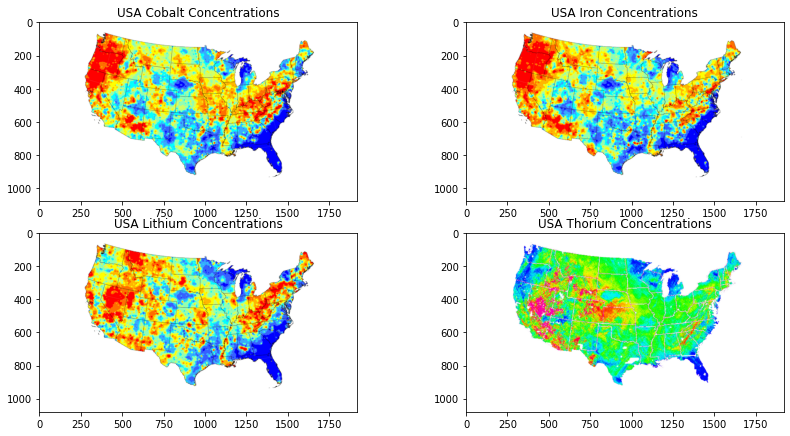

In [3]:
fig, ax = plt.subplots(2, 2, figsize = (12, 6))
plt.tight_layout()
ax[0, 0].set_title("USA Cobalt Concentrations")
ax[0, 0].imshow(cobalt)
ax[0, 1].set_title("USA Iron Concentrations")
ax[0, 1].imshow(iron)
ax[1, 0].set_title("USA Lithium Concentrations")
ax[1, 0].imshow(lithium)
ax[1, 1].set_title("USA Thorium Concentrations")
ax[1, 1].imshow(thorium)
plt.show()

In [4]:
X_cobalt = np.array([
    [98, 7.8, 7.8],
    [100, 43.5, 0],
    [100, 71.8, 0],
    [100, 100, 0],
    [82.4, 100, 41.2],
    [56.9, 100, 70.6],
    [0, 100, 100],
    [22, 67.5, 100],
    [21.2, 38.0, 100],
    [0, 0, 100]
]) / 100

# mg/kg
Y_cobalt = np.array([
    [16.4, 135],
    [12.2, 16.4],
    [10.2, 12.2],
    [8.9, 10.2],
    [7.7, 8.9],
    [6.5, 7.7],
    [5.2, 6.5],
    [3.7, 5.2],
    [2.0, 3.7],
    [0.1, 2.0]
])

In [5]:
X_iron = np.array([
    [100, 0, 0],
    [100, 43.5, 0],
    [100, 71.8, 0],
    [100, 100, 0],
    [82.4, 100, 41.2],
    [56.9, 100, 70.6],
    [0, 100, 100],
    [22, 67.5, 100],
    [21.2, 38.0, 100],
    [0, 0, 100]
]) / 100

#wt%
Y_iron = np.array([
    [3.72, 13.3],
    [2.91, 3.72],
    [2.48, 2.91],
    [2.18, 2.48],
    [1.95, 2.18],
    [1.71, 1.95],
    [1.43, 1.71],
    [1.10, 1.43],
    [0.63, 1.10],
    [0.01, 0.63]
])

In [6]:
X_lithium = np.array([
    [100, 0, 0],
    [100, 43.5, 0],
    [100, 71.8, 0],
    [100, 100, 0],
    [82.4, 100, 41.2],
    [56.9, 100, 70.6],
    [0, 100, 100],
    [22, 67.5, 100],
    [21.2, 38.0, 100],
    [0, 0, 100]
]) / 100

# mg/kg
Y_lithium = np.array([
    [36, 300],
    [29, 36],
    [25, 29],
    [22, 25],
    [20, 22],
    [17, 20],
    [15, 17],
    [11, 15],
    [7, 11],
    [1, 7]
])

In [7]:
X_thorium = np.array([
    [100, 0, 100],
    [95, 23, 23],
    [92, 47, 15],
    [97, 44, 17],
    [97, 59, 0],
    [100, 76, 0],
    [100, 100, 0],
    [82, 82, 0],
    [51, 100, 0],
    [27, 100, 29],
    [27, 65, 26],
    [0, 50, 100],
    [0, 0, 100]
]) / 100

# ppm
Y_thorium = np.linspace(1, 16, 13)[::-1]

## Linear regression on materials

In [8]:
w_cobalt = np.linalg.pinv(X_cobalt) @ Y_cobalt.mean(1)

In [9]:
w_iron = np.linalg.pinv(X_iron) @ Y_iron.mean(1)

In [10]:
w_lithium = np.linalg.pinv(X_lithium) @ Y_lithium.mean(1)

In [11]:
w_thorium = np.linalg.pinv(X_thorium) @ Y_thorium

## Reconstruct concentration maps

In [12]:
cobalt_rec = np.einsum("ijk,k->ij", cobalt/255, w_cobalt)
cobalt_rec[cobalt_rec == cobalt_rec[0, 0]] = 0
cobalt_rec = np.clip(cobalt_rec, 0, cobalt_rec.max())

In [13]:
iron_rec = np.einsum("ijk,k->ij", iron/255, w_iron)
iron_rec[iron_rec == iron_rec[0, 0]] = 0
iron_rec = np.clip(iron_rec, 0, iron_rec.max())

In [14]:
lithium_rec = np.einsum("ijk,k->ij", lithium/255, w_lithium)
lithium_rec[lithium_rec == lithium_rec[0, 0]] = 0
lithium_rec = np.clip(lithium_rec, 0, lithium_rec.max())

In [15]:
thorium_rec = np.einsum("ijk,k->ij", thorium/255, w_thorium)
thorium_rec[thorium_rec == thorium_rec[0, 0]] = 0
thorium_rec = np.clip(thorium_rec, 0, thorium_rec.max())

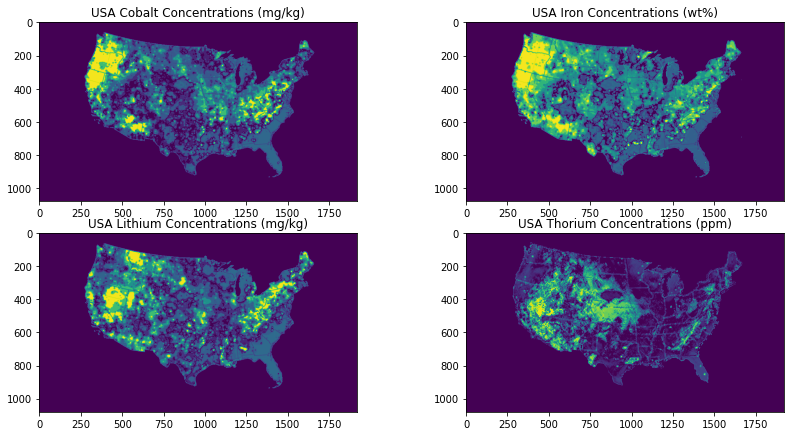

In [16]:
fig, ax = plt.subplots(2, 2, figsize = (12, 6))
plt.tight_layout()
ax[0, 0].set_title("USA Cobalt Concentrations (mg/kg)")
ax[0, 0].imshow(cobalt_rec)
ax[0, 1].set_title("USA Iron Concentrations (wt%)")
ax[0, 1].imshow(iron_rec)
ax[1, 0].set_title("USA Lithium Concentrations (mg/kg)")
ax[1, 0].imshow(lithium_rec)
ax[1, 1].set_title("USA Thorium Concentrations (ppm)")
ax[1, 1].imshow(thorium_rec)
plt.show()

## Composition regression

In [17]:
# Cubic expansion
X = np.dstack([
    np.ones_like(iron_rec),
    iron_rec,
    thorium_rec,
    iron_rec * thorium_rec,
    iron_rec**2,
    thorium_rec**2,
    iron_rec * thorium_rec **2,
    iron_rec**2 * thorium_rec,
    iron_rec**3,
    thorium_rec**3
])

X1 = X.reshape(X.shape[0] * X.shape[1], X.shape[2])

In [18]:
Y_cob = cobalt_rec.flatten()
Y_lit = lithium_rec.flatten()

In [19]:
X1, Y_cob, Y_lit = shuffle(X1, Y_cob, Y_lit)

In [20]:
n = int(0.8 * X1.shape[0])

In [21]:
X_train, YC_train, YL_train = X1[:n], Y_cob[:n], Y_lit[:n]
X_test, YC_test, YL_test = X1[n:], Y_cob[n:], Y_lit[n:]

In [22]:
WC = np.linalg.pinv(X_train) @ YC_train

In [23]:
WL = np.linalg.pinv(X_train) @ YL_train

In [24]:
PC_train = X_train @ WC
PC_test = X_test @ WC

PL_train = X_train @ WL
PL_test = X_test @ WL

In [25]:
print(r2_score(PC_train, YC_train), r2_score(PC_test, YC_test))

0.7555020075604404 0.7554464543699559


In [26]:
print(r2_score(PL_train, YL_train), r2_score(PL_test, YL_test))

0.4619319595500119 0.4625187358802406


In [27]:
cobalt_pred = np.einsum("ijk,k->ij", X, WC)
lithium_pred = np.einsum("ijk,k->ij", X, WL)

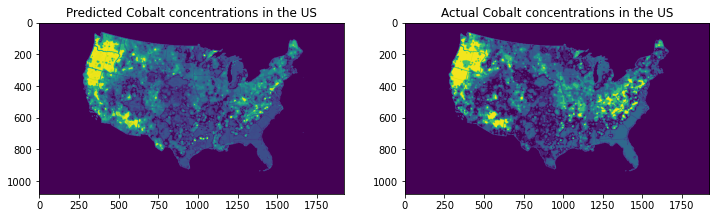

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].set_title("Predicted Cobalt concentrations in the US")
ax[0].imshow(cobalt_pred)
ax[1].set_title("Actual Cobalt concentrations in the US")
ax[1].imshow(cobalt_rec)
plt.show()

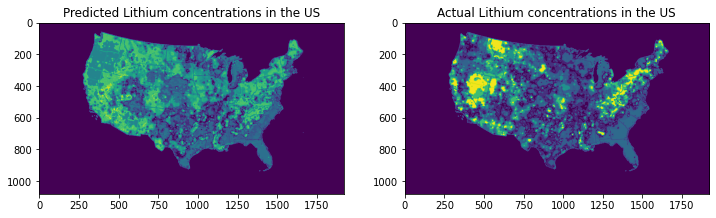

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].set_title("Predicted Lithium concentrations in the US")
ax[0].imshow(lithium_pred)
ax[1].set_title("Actual Lithium concentrations in the US")
ax[1].imshow(lithium_rec)
plt.show()

In [33]:
np.save("models/cobalt_weights.npy", WC)
np.save("models/lithium_weights.npy", WL)